In [1]:
from faker import Faker
import random
import pandas as pd
from datetime import datetime, timedelta

fake = Faker()

# Function to generate random dates
def random_date(start_date, end_date):
    return start_date + timedelta(seconds=random.randint(0, int((end_date - start_date).total_seconds())))

# Generate fake data
num_records = 1000  # Change this to the desired number of records

data = {
    'ID': list(range(1, num_records + 1)),
    'Name': [fake.name() for _ in range(num_records)],
    'Blood_Type': [random.choice(['A', 'B', 'AB', 'O']) for _ in range(num_records)],
    'Plasma_Type': [random.choice(['A', 'B', 'AB', 'O']) for _ in range(num_records)],
    'Plasma_Donation_Quantity_ml': [random.randint(200, 500) for _ in range(num_records)],
    'Blood_Donation_Quantity_ml': [random.randint(200, 500) for _ in range(num_records)],
    'Months_Since_Last_Blood_Donation': [random.randint(1, 12) for _ in range(num_records) ],
    'Number_of_Blood_Donations': [random.randint(1, 10) for _ in range(num_records)],
    'Months_Since_First_Blood_Donation': [random.randint(6, 60)for _ in range(num_records)],
    'Months_Since_Last_Plasma_Donation': [random.randint(1, 12) for _ in range(num_records) ],
    'Number_of_Plasma_Donations': [random.randint(1, 10) for _ in range(num_records)],
    'Months_Since_First_Plasma_Donation': [random.randint(6, 60)for _ in range(num_records)],
    'Diabetic': [random.choice([0, 1]) for _ in range(num_records)],
    'Alcoholic': [random.choice([0, 1]) for _ in range(num_records)],
    'Latitude': [fake.latitude() for _ in range(num_records)],
    'Longitude': [fake.longitude() for _ in range(num_records)]
}

# Create DataFrame
df = pd.DataFrame(data)

# Print the first few rows of the generated DataFrame
print(df.head())

# Save the DataFrame to a CSV file
df.to_csv('blood_plasma_donation_data.csv', index=False)


   ID                Name Blood_Type Plasma_Type  Plasma_Donation_Quantity_ml  \
0   1  Stephanie Reynolds          B           B                          202   
1   2      Mr. Brett Holt          O           A                          267   
2   3       Ricky Bennett          O          AB                          427   
3   4       Benjamin Lane          B          AB                          391   
4   5  Katherine Mcintyre          O           O                          419   

   Blood_Donation_Quantity_ml  Months_Since_Last_Blood_Donation  \
0                         426                                 2   
1                         475                                 6   
2                         489                                 4   
3                         442                                 6   
4                         297                                 6   

   Number_of_Blood_Donations  Months_Since_First_Blood_Donation  \
0                          2               

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('Blood_plasma_donation_data.csv')

In [5]:
df.head()

,ID,Name,Blood_Type,Plasma_Type,Plasma_Donation_Quantity_ml,Blood_Donation_Quantity_ml,Months_Since_Last_Blood_Donation,Number_of_Blood_Donations,Months_Since_First_Blood_Donation,Months_Since_Last_Plasma_Donation,Number_of_Plasma_Donations,Months_Since_First_Plasma_Donation,Diabetic,Alcoholic,Latitude,Longitude
0,1,Stephanie Reynolds,B,B,202,426,2,2,24,12,2,53,1,1,-6.974034,118.748741
1,2,Mr. Brett Holt,O,A,267,475,6,2,31,11,10,10,1,1,10.037418,-66.585984
2,3,Ricky Bennett,O,AB,427,489,4,9,31,4,6,17,1,1,34.232590,-38.363271
3,4,Benjamin Lane,B,AB,391,442,6,3,28,2,9,8,0,1,82.296344,152.219529
4,5,Katherine Mcintyre,O,O,419,297,6,2,15,9,4,23,0,1,-49.398787,9.910857


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  1000 non-null   int64  
 1   Name                                1000 non-null   object 
 2   Blood_Type                          1000 non-null   object 
 3   Plasma_Type                         1000 non-null   object 
 4   Plasma_Donation_Quantity_ml         1000 non-null   int64  
 5   Blood_Donation_Quantity_ml          1000 non-null   int64  
 6   Months_Since_Last_Blood_Donation    1000 non-null   int64  
 7   Number_of_Blood_Donations           1000 non-null   int64  
 8   Months_Since_First_Blood_Donation   1000 non-null   int64  
 9   Months_Since_Last_Plasma_Donation   1000 non-null   int64  
 10  Number_of_Plasma_Donations          1000 non-null   int64  
 11  Months_Since_First_Plasma_Donation  1000 non

In [7]:
df.describe()

,ID,Plasma_Donation_Quantity_ml,Blood_Donation_Quantity_ml,Months_Since_Last_Blood_Donation,Number_of_Blood_Donations,Months_Since_First_Blood_Donation,Months_Since_Last_Plasma_Donation,Number_of_Plasma_Donations,Months_Since_First_Plasma_Donation,Diabetic,Alcoholic,Latitude,Longitude
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,349.512000,347.654000,6.636000,5.502000,32.541000,6.530000,5.711000,33.500000,0.487000,0.496000,-2.226511,-1.303092
std,288.819436,86.733942,87.217746,3.448681,2.888311,15.836133,3.468015,2.898945,16.005505,0.500081,0.500234,51.672384,104.045455
min,1.000000,200.000000,200.000000,1.000000,1.000000,6.000000,1.000000,1.000000,6.000000,0.000000,0.000000,-89.931045,-179.875899
25%,250.750000,276.000000,269.750000,4.000000,3.000000,19.000000,4.000000,3.000000,20.000000,0.000000,0.000000,-46.270933,-92.718913
50%,500.500000,348.500000,347.000000,7.000000,5.000000,32.000000,6.500000,6.000000,33.000000,0.000000,0.000000,-4.781555,0.095462
75%,750.250000,425.000000,423.000000,10.000000,8.000000,46.000000,10.000000,8.000000,48.000000,1.000000,1.000000,43.329190,89.664799
max,1000.000000,500.000000,500.000000,12.000000,10.000000,60.000000,12.000000,10.000000,60.000000,1.000000,1.000000,89.802642,179.857725


In [8]:
blood_type_dummies = pd.get_dummies(df['Blood_Type'], prefix='Blood_Type')
blood_type_dummies

,Blood_Type_A,Blood_Type_AB,Blood_Type_B,Blood_Type_O
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,0,0,1,0
4,0,0,0,1
...,...,...,...,...
995,1,0,0,0
996,0,1,0,0
997,1,0,0,0
998,0,0,0,1


In [9]:
# Concatenate the original DataFrame with the dummy variables
df = pd.concat([df, blood_type_dummies], axis=1)
df.head()

,ID,Name,Blood_Type,Plasma_Type,Plasma_Donation_Quantity_ml,Blood_Donation_Quantity_ml,Months_Since_Last_Blood_Donation,Number_of_Blood_Donations,Months_Since_First_Blood_Donation,Months_Since_Last_Plasma_Donation,Number_of_Plasma_Donations,Months_Since_First_Plasma_Donation,Diabetic,Alcoholic,Latitude,Longitude,Blood_Type_A,Blood_Type_AB,Blood_Type_B,Blood_Type_O
0,1,Stephanie Reynolds,B,B,202,426,2,2,24,12,2,53,1,1,-6.974034,118.748741,0,0,1,0
1,2,Mr. Brett Holt,O,A,267,475,6,2,31,11,10,10,1,1,10.037418,-66.585984,0,0,0,1
2,3,Ricky Bennett,O,AB,427,489,4,9,31,4,6,17,1,1,34.232590,-38.363271,0,0,0,1
3,4,Benjamin Lane,B,AB,391,442,6,3,28,2,9,8,0,1,82.296344,152.219529,0,0,1,0
4,5,Katherine Mcintyre,O,O,419,297,6,2,15,9,4,23,0,1,-49.398787,9.910857,0,0,0,1


In [10]:

# Drop the original 'Blood_Type' column (optional)
df = df.drop('Blood_Type', axis=1)

In [11]:
df.sample(5)

,ID,Name,Plasma_Type,Plasma_Donation_Quantity_ml,Blood_Donation_Quantity_ml,Months_Since_Last_Blood_Donation,Number_of_Blood_Donations,Months_Since_First_Blood_Donation,Months_Since_Last_Plasma_Donation,Number_of_Plasma_Donations,Months_Since_First_Plasma_Donation,Diabetic,Alcoholic,Latitude,Longitude,Blood_Type_A,Blood_Type_AB,Blood_Type_B,Blood_Type_O
634,635,Lori Young PhD,O,444,222,5,1,53,4,6,14,0,1,-37.773483,74.949776,0,0,1,0
684,685,Thomas Sherman,B,474,439,12,10,35,5,10,56,0,1,-15.752928,31.466816,0,0,1,0
552,553,Rachel Brown,O,456,383,7,6,50,11,6,20,0,1,-3.445171,177.246440,0,1,0,0
138,139,Dennis Holloway,A,206,200,3,10,37,6,5,23,1,1,-27.266572,176.877625,0,0,1,0
164,165,Carly Willis,A,379,354,2,2,18,10,7,11,0,1,41.654891,90.158326,0,1,0,0


In [12]:
plasma_type_dummies = pd.get_dummies(df['Plasma_Type'], prefix='Plasma_Type')
plasma_type_dummies

,Plasma_Type_A,Plasma_Type_AB,Plasma_Type_B,Plasma_Type_O
0,0,0,1,0
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,1
...,...,...,...,...
995,1,0,0,0
996,0,0,0,1
997,1,0,0,0
998,1,0,0,0


In [13]:
# Concatenate the original DataFrame with the dummy variables
df = pd.concat([df, plasma_type_dummies], axis=1)

# Drop the original 'Plasma_Type' column (optional)
df = df.drop('Plasma_Type', axis=1)

In [14]:
df.head()

,ID,Name,Plasma_Donation_Quantity_ml,Blood_Donation_Quantity_ml,Months_Since_Last_Blood_Donation,Number_of_Blood_Donations,Months_Since_First_Blood_Donation,Months_Since_Last_Plasma_Donation,Number_of_Plasma_Donations,Months_Since_First_Plasma_Donation,...,Latitude,Longitude,Blood_Type_A,Blood_Type_AB,Blood_Type_B,Blood_Type_O,Plasma_Type_A,Plasma_Type_AB,Plasma_Type_B,Plasma_Type_O
0,1,Stephanie Reynolds,202,426,2,2,24,12,2,53,...,-6.974034,118.748741,0,0,1,0,0,0,1,0
1,2,Mr. Brett Holt,267,475,6,2,31,11,10,10,...,10.037418,-66.585984,0,0,0,1,1,0,0,0
2,3,Ricky Bennett,427,489,4,9,31,4,6,17,...,34.232590,-38.363271,0,0,0,1,0,1,0,0
3,4,Benjamin Lane,391,442,6,3,28,2,9,8,...,82.296344,152.219529,0,0,1,0,0,1,0,0
4,5,Katherine Mcintyre,419,297,6,2,15,9,4,23,...,-49.398787,9.910857,0,0,0,1,0,0,0,1


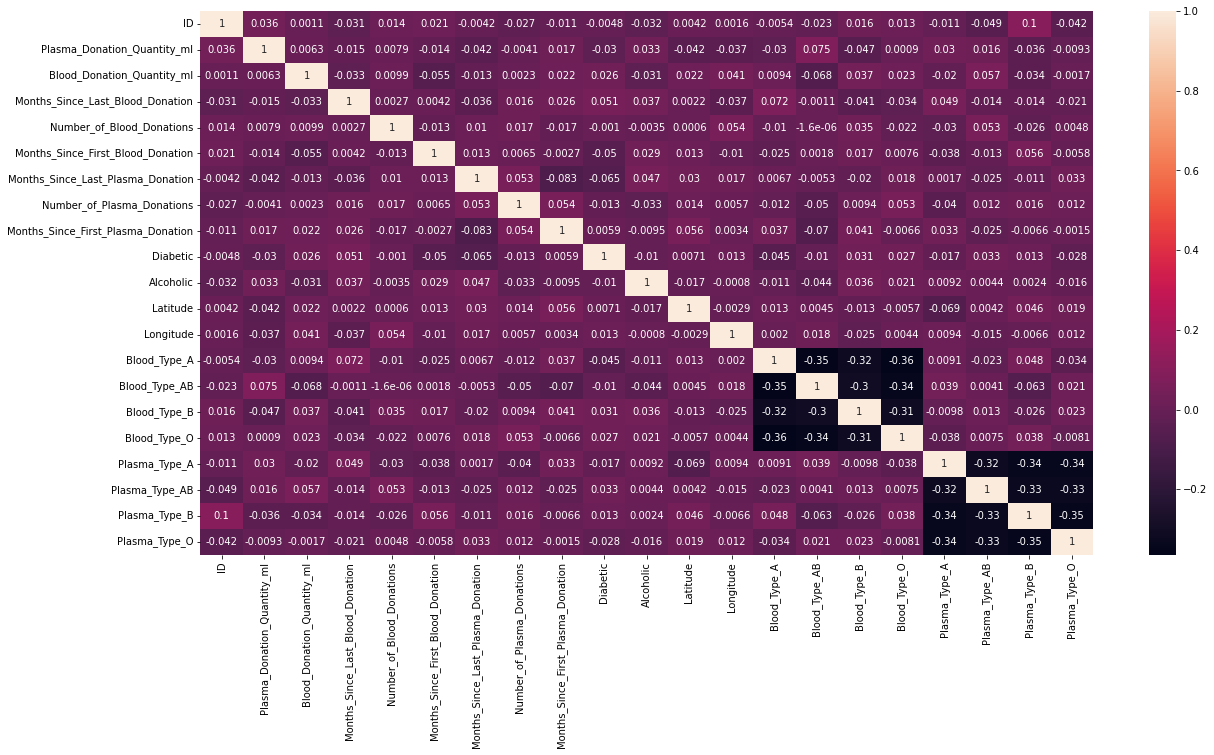

In [15]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

In [16]:
df.columns

Index(['ID', 'Name', 'Plasma_Donation_Quantity_ml',
       'Blood_Donation_Quantity_ml', 'Months_Since_Last_Blood_Donation',
       'Number_of_Blood_Donations', 'Months_Since_First_Blood_Donation',
       'Months_Since_Last_Plasma_Donation', 'Number_of_Plasma_Donations',
       'Months_Since_First_Plasma_Donation', 'Diabetic', 'Alcoholic',
       'Latitude', 'Longitude', 'Blood_Type_A', 'Blood_Type_AB',
       'Blood_Type_B', 'Blood_Type_O', 'Plasma_Type_A', 'Plasma_Type_AB',
       'Plasma_Type_B', 'Plasma_Type_O'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  1000 non-null   int64  
 1   Name                                1000 non-null   object 
 2   Plasma_Donation_Quantity_ml         1000 non-null   int64  
 3   Blood_Donation_Quantity_ml          1000 non-null   int64  
 4   Months_Since_Last_Blood_Donation    1000 non-null   int64  
 5   Number_of_Blood_Donations           1000 non-null   int64  
 6   Months_Since_First_Blood_Donation   1000 non-null   int64  
 7   Months_Since_Last_Plasma_Donation   1000 non-null   int64  
 8   Number_of_Plasma_Donations          1000 non-null   int64  
 9   Months_Since_First_Plasma_Donation  1000 non-null   int64  
 10  Diabetic                            1000 non-null   int64  
 11  Alcoholic                           1000 non

In [18]:
df['suitable'] = np.random.choice([0, 1], size=num_records)

In [19]:
df.sample(5)

,ID,Name,Plasma_Donation_Quantity_ml,Blood_Donation_Quantity_ml,Months_Since_Last_Blood_Donation,Number_of_Blood_Donations,Months_Since_First_Blood_Donation,Months_Since_Last_Plasma_Donation,Number_of_Plasma_Donations,Months_Since_First_Plasma_Donation,...,Longitude,Blood_Type_A,Blood_Type_AB,Blood_Type_B,Blood_Type_O,Plasma_Type_A,Plasma_Type_AB,Plasma_Type_B,Plasma_Type_O,suitable
545,546,Laura Wheeler,297,209,11,5,22,10,7,17,...,127.636019,0,0,1,0,1,0,0,0,1
501,502,Ryan Bowers,390,454,5,5,36,1,8,38,...,167.422731,0,0,1,0,0,0,0,1,0
894,895,Joanna Mcdonald,470,215,10,5,34,7,6,26,...,-101.752585,0,1,0,0,0,0,0,1,1
641,642,Heather Miller,334,490,6,8,12,7,6,45,...,148.925935,0,1,0,0,1,0,0,0,1
164,165,Carly Willis,379,354,2,2,18,10,7,11,...,90.158326,0,1,0,0,1,0,0,0,0


In [20]:
# Features and target
X = df[[ 'Plasma_Donation_Quantity_ml',
       'Blood_Donation_Quantity_ml', 'Months_Since_Last_Blood_Donation',
       'Number_of_Blood_Donations', 'Months_Since_First_Blood_Donation',
       'Months_Since_Last_Plasma_Donation', 'Number_of_Plasma_Donations',
       'Months_Since_First_Plasma_Donation', 'Diabetic', 'Alcoholic',
       'Latitude', 'Longitude', 'Blood_Type_A', 'Blood_Type_AB',
       'Blood_Type_B', 'Blood_Type_O', 'Plasma_Type_A', 'Plasma_Type_AB',
       'Plasma_Type_B', 'Plasma_Type_O']]
y = df['suitable'].notnull().astype(int)


In [21]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Build the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {accuracy}')

# Print classification report for detailed metrics
print("Classification Report:\n", classification_report(y_test, predictions))

Model Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [23]:
model1 = RandomForestClassifier(random_state=42)
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [24]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=3)
model2.fit(X_train[['Latitude', 'Longitude']], y_train)

predictions = model2.predict(X_test[['Latitude', 'Longitude']])

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, predictions)}')
print('Classification Report:')
print(classification_report(y_test, predictions))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [25]:
from faker import Faker
import random
import pandas as pd
from datetime import datetime, timedelta

fake = Faker()

# Function to generate random dates
def random_date(start_date, end_date):
    return start_date + timedelta(seconds=random.randint(0, int((end_date - start_date).total_seconds())))

# Generate fake data
num_records = 1000  # Change this to the desired number of records

data = {
    'ID': list(range(1, num_records + 1)),
    'Name': [fake.name() for _ in range(num_records)],
    'Blood_Type': [random.choice(['A', 'B', 'AB', 'O']) for _ in range(num_records)],
    'Plasma_Type': [random.choice(['A', 'B', 'AB', 'O']) for _ in range(num_records)],
    'Plasma_Donation_Quantity_ml': [random.randint(200, 500) for _ in range(num_records)],
    'Blood_Donation_Quantity_ml': [random.randint(200, 500) for _ in range(num_records)],
    'Months_Since_Last_Blood_Donation': [random.randint(1, 12) for _ in range(num_records) ],
    'Number_of_Blood_Donations': [random.randint(1, 10) for _ in range(num_records)],
    'Months_Since_First_Blood_Donation': [random.randint(6, 60)for _ in range(num_records)],
    'Months_Since_Last_Plasma_Donation': [random.randint(1, 12) for _ in range(num_records) ],
    'Number_of_Plasma_Donations': [random.randint(1, 10) for _ in range(num_records)],
    'Months_Since_First_Plasma_Donation': [random.randint(6, 60)for _ in range(num_records)],
    'Diabetic': [random.choice([0, 1]) for _ in range(num_records)],
    'Alcoholic': [random.choice([0, 1]) for _ in range(num_records)],
    'Latitude': [fake.latitude() for _ in range(num_records)],
    'Longitude': [fake.longitude() for _ in range(num_records)]
}

# Create DataFrame
df = pd.DataFrame(data)

# Print the first few rows of the generated DataFrame
print(df.head())

# Save the DataFrame to a CSV file
df.to_csv('recipient.csv', index=False)


   ID               Name Blood_Type Plasma_Type  Plasma_Donation_Quantity_ml  \
0   1      Hannah Valdez          B           A                          344   
1   2  Veronica Martinez          O           B                          497   
2   3       Shelia Moore          A          AB                          217   
3   4       Wesley Perez          B           O                          337   
4   5         Katie Pugh         AB           O                          316   

   Blood_Donation_Quantity_ml  Months_Since_Last_Blood_Donation  \
0                         341                                 3   
1                         221                                11   
2                         452                                 4   
3                         299                                 6   
4                         203                                 5   

   Number_of_Blood_Donations  Months_Since_First_Blood_Donation  \
0                          6                     

In [26]:
recipent_df = pd.read_csv('recipient.csv')

In [27]:
recipent_df.head()

,ID,Name,Blood_Type,Plasma_Type,Plasma_Donation_Quantity_ml,Blood_Donation_Quantity_ml,Months_Since_Last_Blood_Donation,Number_of_Blood_Donations,Months_Since_First_Blood_Donation,Months_Since_Last_Plasma_Donation,Number_of_Plasma_Donations,Months_Since_First_Plasma_Donation,Diabetic,Alcoholic,Latitude,Longitude
0,1,Hannah Valdez,B,A,344,341,3,6,13,9,2,59,1,0,-47.240667,33.150990
1,2,Veronica Martinez,O,B,497,221,11,7,17,1,1,58,0,0,69.713989,57.864664
2,3,Shelia Moore,A,AB,217,452,4,8,31,5,10,53,1,0,43.666970,-148.680116
3,4,Wesley Perez,B,O,337,299,6,10,12,12,7,10,1,1,40.200316,85.628000
4,5,Katie Pugh,AB,O,316,203,5,8,31,6,2,26,0,0,60.550929,-86.953656


In [28]:
blood_type_dummies = pd.get_dummies(recipent_df['Blood_Type'], prefix='Blood_Type')
blood_type_dummies
# Concatenate the original DataFrame with the dummy variables
recipent_df = pd.concat([recipent_df, blood_type_dummies], axis=1)

# Drop the original 'Blood_Type' column (optional)
recipent_df = recipent_df.drop('Blood_Type', axis=1)


In [29]:
plasma_type_dummies = pd.get_dummies(recipent_df['Plasma_Type'], prefix='Plasma_Type')
plasma_type_dummies

# Concatenate the original DataFrame with the dummy variables
recipent_df = pd.concat([recipent_df, plasma_type_dummies], axis=1)

# Drop the original 'Plasma_Type' column (optional)
recipent_df = recipent_df.drop('Plasma_Type', axis=1)

In [30]:
recipent_df.sample(5)

,ID,Name,Plasma_Donation_Quantity_ml,Blood_Donation_Quantity_ml,Months_Since_Last_Blood_Donation,Number_of_Blood_Donations,Months_Since_First_Blood_Donation,Months_Since_Last_Plasma_Donation,Number_of_Plasma_Donations,Months_Since_First_Plasma_Donation,...,Latitude,Longitude,Blood_Type_A,Blood_Type_AB,Blood_Type_B,Blood_Type_O,Plasma_Type_A,Plasma_Type_AB,Plasma_Type_B,Plasma_Type_O
818,819,Melissa Bates,497,205,4,3,28,6,10,44,...,-25.471860,-17.015782,0,1,0,0,1,0,0,0
771,772,Amanda Hernandez,320,409,8,3,37,10,4,37,...,11.600421,154.692437,1,0,0,0,0,0,1,0
431,432,Margaret Evans,375,244,9,6,51,9,6,41,...,-6.402190,-34.885426,1,0,0,0,0,1,0,0
974,975,Jesse Anderson,260,496,4,3,34,4,2,8,...,-37.927763,-86.878460,0,0,0,1,0,1,0,0
404,405,Andrew Wilson,320,496,10,2,45,3,1,26,...,14.960567,66.843817,0,0,0,1,1,0,0,0


In [31]:
# Example: Identify suitable donors for a recipient
recipient_data = recipent_df.sample(1)  # Simulating data upload by a recipient
recipient_details = recipient_data[[ 'Plasma_Donation_Quantity_ml',
       'Blood_Donation_Quantity_ml', 'Months_Since_Last_Blood_Donation',
       'Number_of_Blood_Donations', 'Months_Since_First_Blood_Donation',
       'Months_Since_Last_Plasma_Donation', 'Number_of_Plasma_Donations',
       'Months_Since_First_Plasma_Donation', 'Diabetic', 'Alcoholic',
       'Latitude', 'Longitude', 'Blood_Type_A', 'Blood_Type_AB',
       'Blood_Type_B', 'Blood_Type_O', 'Plasma_Type_A', 'Plasma_Type_AB',
       'Plasma_Type_B', 'Plasma_Type_O']]

# Use the trained model to predict suitable donors
suitable_donors = model1.predict(recipient_details)

print(f"\nSuitable Donors for the Recipient (ID: {recipient_data['ID'].values[0]}):")
print(suitable_donors)


Suitable Donors for the Recipient (ID: 280):
[1]


In [32]:
# Replace these values with the new recipient's details
new_recipient = pd.DataFrame({
    'Plasma_Donation_Quantity_ml' : [400],
    'Blood_Donation_Quantity_ml': [497],
    'Months_Since_Last_Blood_Donation':[2],
    'Number_of_Blood_Donations': [11], 
    'Months_Since_First_Blood_Donation':[35],
    'Months_Since_Last_Plasma_Donation':[45],
    'Number_of_Plasma_Donations':[2],
    'Months_Since_First_Plasma_Donation':[16],
    'Blood_Type_A': [1],
    'Blood_Type_AB': [0],
    'Blood_Type_B':[0],
    'Blood_Type_O':[0],
    'Plasma_Type_A': [0],
    'Plasma_Type_AB': [1],
    'Plasma_Type_B':[0],
    'Plasma_Type_O':[0],
    'Diabetes': [0],
    'Alcoholic': [1],
    'Latitude': [40.7128],
    'Longitude': [-74.0060],
})

# Make a prediction for the new recipient
new_recipient_prediction = model1.predict(new_recipient)
print(f"The predicted donor ID for the new recipient is: {new_recipient_prediction[0]}")

The predicted donor ID for the new recipient is: 1
